In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Shoe prices.csv')
data


,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,Air Jordan 1,Basketball,Men,US 10,Red/Black,Leather,$170.00
1,Adidas,Ultra Boost 21,Running,Men,US 9.5,Black,Primeknit,$180.00
2,Reebok,Classic Leather,Casual,Men,US 11,White,Leather,$75.00
3,Converse,Chuck Taylor,Casual,Women,US 8,Navy,Canvas,$55.00
4,Puma,Future Rider,Lifestyle,Women,US 7.5,Pink,Mesh,$80.00
...,...,...,...,...,...,...,...,...
1001,New Balance,Fresh Foam 880v11,Running,Women,US 10,Grey,Mesh,$130.00
1002,Asics,Gel-Kayano Lite,Running,Men,US 9.5,Black,Mesh,$160.00
1003,Fila,Venom 94,Fashion,Women,US 7.5,White,Leather,$70.00
1004,Skechers,Summits,Training,Men,US 8,Grey,Mesh,$55.00


In [339]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        1006 non-null   object
 1   Model        1006 non-null   object
 2   Type         1006 non-null   object
 3   Gender       1006 non-null   object
 4   Size         1006 non-null   object
 5   Color        1006 non-null   object
 6   Material     1006 non-null   object
 7   Price (USD)  1006 non-null   object
dtypes: object(8)
memory usage: 63.0+ KB


In [340]:
print(data.describe())


       Brand   Model     Type Gender    Size  Color Material Price (USD)
count   1006    1006     1006   1006    1006   1006     1006        1006
unique    10     239       18      2      13     82       34          33
top     Nike  NMD_R1  Running    Men  US 8.5  Black     Mesh     $65.00 
freq     118      39      332    535     132    178      308         121


In [341]:
print(data.isnull().sum())

Brand          0
Model          0
Type           0
Gender         0
Size           0
Color          0
Material       0
Price (USD)    0
dtype: int64


In [342]:
print(data.duplicated().sum())

81


In [343]:
data = data.drop_duplicates()

In [344]:
data['Price (USD)'] = (
    data['Price (USD)']
    .str.replace('[\$,]', '', regex=True)   # remove $ and commas
    .str.strip()                            # remove spaces
)

data['Price (USD)'] = pd.to_numeric(data['Price (USD)'], errors='coerce')


C:\Users\Aniket\AppData\Local\Temp\ipykernel_23396\1434151348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price (USD)'] = (
C:\Users\Aniket\AppData\Local\Temp\ipykernel_23396\1434151348.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price (USD)'] = pd.to_numeric(data['Price (USD)'], errors='coerce')


In [345]:
data['Size'] = data['Size'].str.replace('US ','').astype(float)

C:\Users\Aniket\AppData\Local\Temp\ipykernel_23396\2425976972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Size'] = data['Size'].str.replace('US ','').astype(float)


In [346]:
data

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,Air Jordan 1,Basketball,Men,10.0,Red/Black,Leather,170.0
1,Adidas,Ultra Boost 21,Running,Men,9.5,Black,Primeknit,180.0
2,Reebok,Classic Leather,Casual,Men,11.0,White,Leather,75.0
3,Converse,Chuck Taylor,Casual,Women,8.0,Navy,Canvas,55.0
4,Puma,Future Rider,Lifestyle,Women,7.5,Pink,Mesh,80.0
...,...,...,...,...,...,...,...,...
1001,New Balance,Fresh Foam 880v11,Running,Women,10.0,Grey,Mesh,130.0
1002,Asics,Gel-Kayano Lite,Running,Men,9.5,Black,Mesh,160.0
1003,Fila,Venom 94,Fashion,Women,7.5,White,Leather,70.0
1004,Skechers,Summits,Training,Men,8.0,Grey,Mesh,55.0


In [347]:
model_counts = data['Model'].value_counts()
data['Model_Encoded'] = data['Model'].map(model_counts)

C:\Users\Aniket\AppData\Local\Temp\ipykernel_23396\3665492145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Model_Encoded'] = data['Model'].map(model_counts)


In [348]:
color_counts = data['Color'].value_counts()
data['Color_Encoded'] = data['Color'].map(color_counts)

C:\Users\Aniket\AppData\Local\Temp\ipykernel_23396\2557671664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Color_Encoded'] = data['Color'].map(color_counts)


In [349]:
data

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD),Model_Encoded,Color_Encoded
0,Nike,Air Jordan 1,Basketball,Men,10.0,Red/Black,Leather,170.0,1,2
1,Adidas,Ultra Boost 21,Running,Men,9.5,Black,Primeknit,180.0,1,170
2,Reebok,Classic Leather,Casual,Men,11.0,White,Leather,75.0,2,106
3,Converse,Chuck Taylor,Casual,Women,8.0,Navy,Canvas,55.0,1,23
4,Puma,Future Rider,Lifestyle,Women,7.5,Pink,Mesh,80.0,2,59
...,...,...,...,...,...,...,...,...,...,...
1001,New Balance,Fresh Foam 880v11,Running,Women,10.0,Grey,Mesh,130.0,3,98
1002,Asics,Gel-Kayano Lite,Running,Men,9.5,Black,Mesh,160.0,4,170
1003,Fila,Venom 94,Fashion,Women,7.5,White,Leather,70.0,1,106
1004,Skechers,Summits,Training,Men,8.0,Grey,Mesh,55.0,5,98


In [350]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

C:\Users\Aniket\AppData\Local\Temp\ipykernel_23396\4026104656.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'] = le.fit_transform(data['Gender'])


In [351]:
data = pd.get_dummies(data, columns=['Brand','Type','Material'], drop_first=True)

In [352]:
print(data.columns)


Index(['Model', 'Gender', 'Size', 'Color', 'Price (USD)', 'Model_Encoded',
       'Color_Encoded', 'Brand_Asics', 'Brand_Converse', 'Brand_Fila',
       'Brand_New Balance', 'Brand_Nike', 'Brand_Puma', 'Brand_Reebok',
       'Brand_Skechers', 'Brand_Vans', 'Type_Casual', 'Type_Cross-training',
       'Type_CrossFit', 'Type_Crossfit', 'Type_Fashion', 'Type_Hiking',
       'Type_Lifestyle', 'Type_Racing', 'Type_Retro', 'Type_Running',
       'Type_Skate', 'Type_Slides', 'Type_Trail', 'Type_Trail Running',
       'Type_Training', 'Type_Walking', 'Type_Weightlifting',
       'Material_Canvas/Leather', 'Material_Canvas/Suede',
       'Material_Flexweave', 'Material_Flexweave/Cushioning',
       'Material_Flexweave/Knit', 'Material_Flexweave/Synthetic',
       'Material_Flyknit', 'Material_Knit', 'Material_Knit/Synthetic',
       'Material_Leather', 'Material_Leather/Mesh', 'Material_Leather/Suede',
       'Material_Leather/Synthetic', 'Material_Mesh', 'Material_Mesh/Leather',
       'Materi

In [353]:
# Convert boolean to int
float_cols = data.select_dtypes(include=['float', 'bool']).columns
for col in float_cols:
    if data[col].dtype == 'bool':
        data[col] = data[col].astype(int)

In [354]:
# Drop original categorical columns
data = data.drop(columns=["Model", "Color"])

In [355]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=["Price (USD)"])
y = data["Price (USD)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_train.shape)

Training data shape: (740, 63)
Testing data shape: (740, 63)


In [356]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [357]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Estimated Accuracy (100% - MAPE): {100 - mape}%")


Mean Absolute Error (MAE): 9.533277889317889
Mean Squared Error (MSE): 247.86631394674728
Root Mean Squared Error (RMSE): 15.743770639422669
R2 Score: 0.8476839962936027
Mean Absolute Percentage Error (MAPE): 9.48549124339265%
Estimated Accuracy (100% - MAPE): 90.51450875660736%


In [ ]:

# 3. Train your model (this is the part that creates 'best_model')
from sklearn.ensemble import RandomForestRegressor   # or GradientBoostingRegressor, XGBRegressor, etc.

best_model = RandomForestRegressor(n_estimators=300, random_state=42)
best_model.fit(X_train, y_train)        # ← this line creates .feature_importances_

RandomForestRegressor(n_estimators=300, random_state=42)

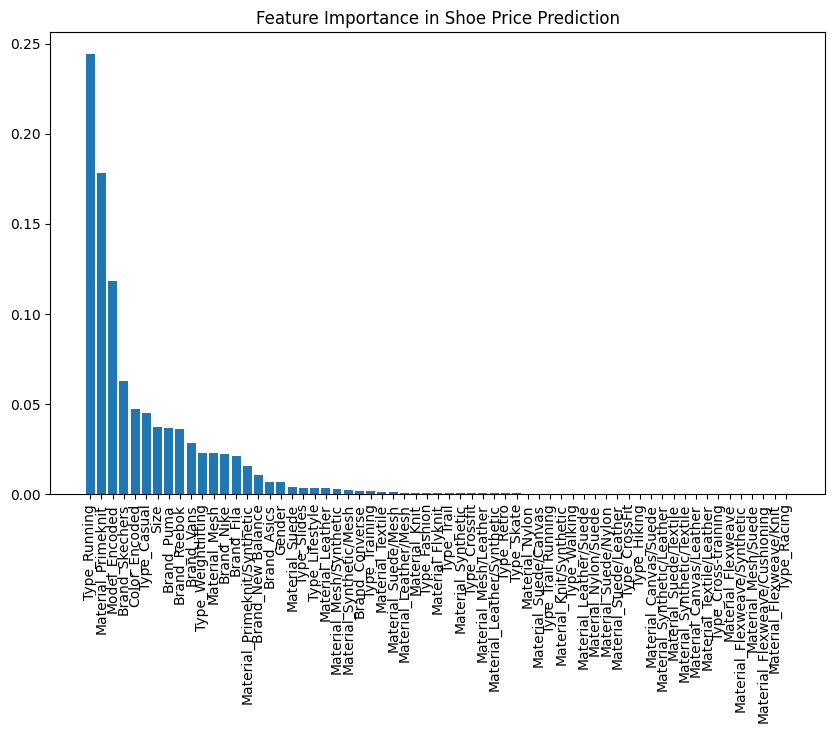

In [359]:
importances = best_model.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance in Shoe Price Prediction")
plt.bar(range(len(sorted_indices)), importances[sorted_indices], align="center")
plt.xticks(range(len(sorted_indices)), feature_names[sorted_indices], rotation=90)
plt.show()

In [360]:
new_shoe = pd.DataFrame({
    'Gender': [1],
    'Size': [9.5],
    'Model_Encoded': [2],
    'Color_Encoded': [50],
    'Brand_Nike': [1],
    'Brand_Adidas': [0],
    'Brand_Puma': [0],
    'Type_Running': [1],
    'Type_Casual': [0],
    'Material_Leather': [1],
    'Material_Mesh': [0]
})

new_shoe = new_shoe.reindex(columns=X_train.columns, fill_value=0)

predicted_price = best_model.predict(new_shoe)
print(f"Predicted Shoe Price: ${predicted_price[0]:.2f}")


Predicted Shoe Price: $148.60


In [361]:
import pickle

# Save model
with open("shoe_price_model.pkl", "wb") as model_file:
    pickle.dump(rf_model, model_file)

# Save encoding mappings
encoding_mappings = {
    "model_counts": model_counts.to_dict(),
    "color_counts": color_counts.to_dict(),
    "label_encoder_gender": le
}
with open("encoding_mappings.pkl", "wb") as f:
    pickle.dump(encoding_mappings, f)